In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/E-Commerce Shipping Data.csv')

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.shape

(10999, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
cat=[]
num=[]
for i in df:
  try:
    float(df[i].mode().iloc[0])
    num.append(i)
  except:
    cat.append(i)

In [ ]:
cat

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [ ]:
num

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-507-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

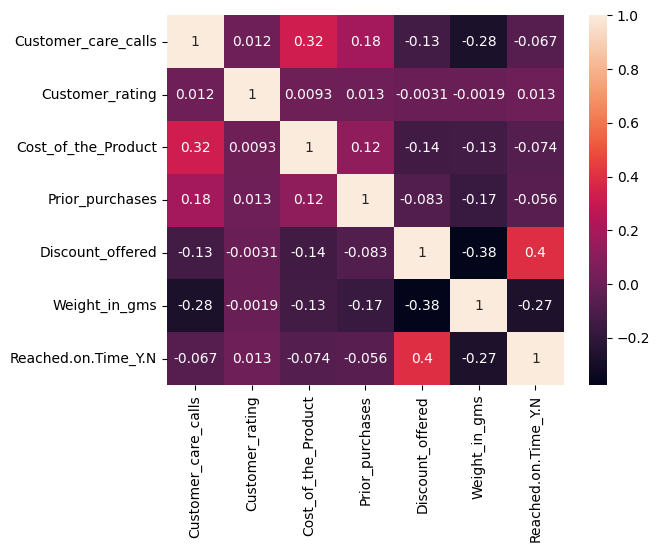

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


##Categorical Column's unique values



In [ ]:
for i in cat:
  print(i)
  print(df[i].nunique())
  print(df[i].unique())
  print()

Warehouse_block
5
['D' 'F' 'A' 'B' 'C']

Mode_of_Shipment
3
['Flight' 'Ship' 'Road']

Product_importance
3
['low' 'medium' 'high']

Gender
2
['F' 'M']



##Perform Outlier Analysis and remove them:

In [ ]:
# for i in num:
#   if i != 'Reached.on.Time_Y.N':
#     q1=df[i].quantile(0.25)
#     q3=df[i].quantile(0.75)
#     iqr=q3-q1
#     vl=q1-iqr*1.5
#     ul=q3+iqr*1.5
#     df=df[(df[i]>=vl)&(df[i]<=ul)]

In [ ]:
df.shape

(10999, 11)

##Applying Scaling and Encoding:




In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
for i in num:
  if i != 'Reached.on.Time_Y.N':
    df[i]=sc.fit_transform(df[[i]])



In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,1,0,0,1,0,0,0,1,0,0
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,1,0,0,0,1,0,0,1,0,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,1,0,0,0,0,0,0,1,0,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,1,1,0,0,0,0,0,0,1,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730,1,0,0,0,0,0,1,0,1,0
10995,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679,0,1,0,0,0,0,1,0,1,0
10996,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937,0,0,1,0,0,0,1,1,0,0
10997,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304,0,0,0,0,1,0,1,0,1,1


## Defining x and y :
here x= Featurs and y= target value

In [ ]:
x=df.drop(['Reached.on.Time_Y.N'],axis=1)
y=df['Reached.on.Time_Y.N']

## Applying PCA and reducing dimensions using elbow method (ploting the step of %variance explained by eigen values)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=15)
pca.fit(x)

PCA(n_components=15)

In [ ]:
pca.explained_variance_


array([1.61965251, 1.3539663 , 0.999776  , 0.89809141, 0.67982233,
       0.47927446, 0.42733016, 0.2925123 , 0.27091336, 0.24978702,
       0.16666625, 0.16654757, 0.05988047, 0.03893946, 0.0340772 ])

In [ ]:
pca.explained_variance_ratio_

array([0.20933216, 0.17499352, 0.12921616, 0.11607392, 0.08786371,
       0.06194388, 0.05523033, 0.03780578, 0.03501423, 0.03228375,
       0.0215408 , 0.02152546, 0.00773926, 0.00503273, 0.00440431])

In [ ]:
pca.components_

array([[ 5.94346623e-01,  2.90139415e-02,  4.95321960e-01,
         4.03589791e-01,  4.46660193e-03, -4.86278264e-01,
         3.29839910e-04,  1.16683482e-03,  2.07323250e-03,
        -2.03640313e-03,  9.23527620e-04, -2.82173976e-03,
         2.99914290e-02, -1.64994299e-02,  2.18415649e-03],
       [-1.57446833e-01, -2.02324487e-02, -2.74170395e-01,
        -9.76461864e-02,  7.69042313e-01, -5.46293721e-01,
        -2.41324604e-03, -1.15620894e-03, -2.61919430e-03,
         5.09897434e-03, -3.38717758e-03,  4.96129603e-03,
         7.53413602e-03, -7.01498312e-03, -7.20906088e-03],
       [-2.92870587e-02,  9.97955169e-01, -4.01986706e-02,
         3.30618265e-02,  1.71426655e-02,  9.67966220e-03,
        -1.73136441e-03,  4.37758370e-05,  3.65325289e-03,
         1.86714260e-03,  4.71666056e-04,  6.29721360e-04,
        -8.17961417e-03,  6.55747612e-03,  8.98548211e-04],
       [-2.16075915e-01, -5.19431638e-02, -4.23212190e-01,
         8.73283569e-01, -6.94469928e-02,  2.17732250

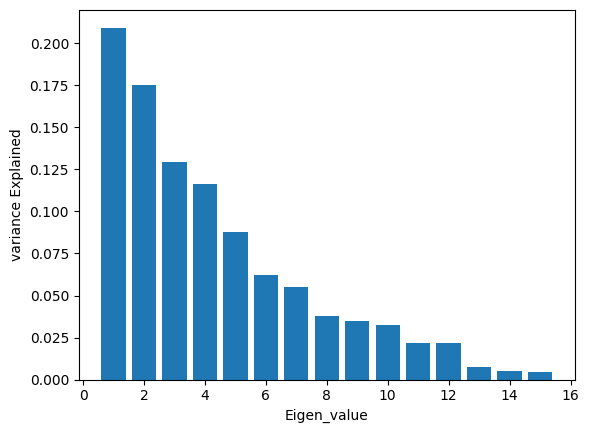

In [ ]:
plt.bar(list(range(1,16)),pca.explained_variance_ratio_)
plt.ylabel('variance Explained')
plt.xlabel('Eigen_value')
plt.show()

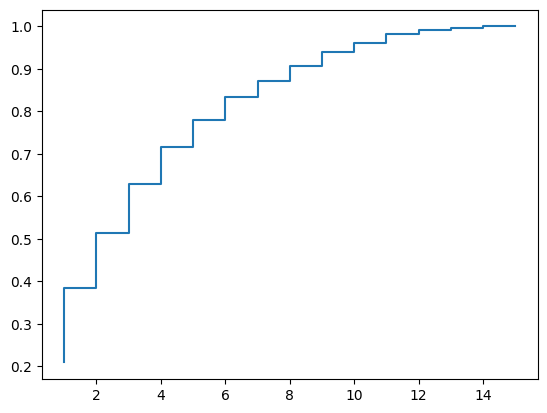

In [ ]:
plt.step(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_),where='pre')

In [ ]:
pca1=PCA(n_components=8)
pca1.fit(x)

PCA(n_components=8)

In [ ]:
xpca1=pca1.transform(x)

In [ ]:
xpca1

array([[ 0.20668423,  2.50743042, -0.66961467, ..., -0.39683648,
         0.45762533,  0.47950597],
       [-0.14423291,  2.39882179,  1.42000775, ...,  0.4867607 ,
         1.3518499 ,  0.47217353],
       [-1.14328651,  2.15496681, -0.58745591, ..., -0.24050737,
         0.87297332,  0.49751445],
       ...,
       [ 1.9768384 , -0.02400781,  0.66002227, ..., -1.04921299,
        -0.15922484, -0.35631294],
       [ 1.94058799, -0.07990836, -0.69870116, ..., -0.05271891,
        -1.09229302, -0.36816038],
       [-0.6038317 ,  0.80355906,  1.52435167, ..., -1.82475682,
        -0.64752621, -0.33409706]])

In [ ]:
x1=pd.DataFrame(xpca1)

In [ ]:
x1

,0,1,2,3,4,5,6,7
0,0.206684,2.507430,-0.669615,-0.177148,-0.305287,-0.396836,0.457625,0.479506
1,-0.144233,2.398822,1.420008,-1.263399,0.449869,0.486761,1.351850,0.472174
2,-1.143287,2.154967,-0.587456,0.717177,1.221115,-0.240507,0.872973,0.497514
3,-0.077532,0.956229,0.058541,0.766674,-0.024809,-0.597078,-1.572521,0.492928
4,-1.181420,2.407289,-0.603505,0.221608,1.085309,0.400835,-0.550530,0.512231
...,...,...,...,...,...,...,...,...
10994,1.335248,-0.183889,-1.426890,0.610859,0.560170,-0.315737,-1.339053,-0.338817
10995,1.217366,0.262291,-1.408326,0.761042,0.333596,-0.277805,-1.329707,-0.335844
10996,1.976838,-0.024008,0.660022,0.296663,-0.195795,-1.049213,-0.159225,-0.356313
10997,1.940588,-0.079908,-0.698701,1.188879,-0.309620,-0.052719,-1.092293,-0.368160


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=23)

##Appling logisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1344
           1       0.70      0.68      0.69      1956

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



## Appling DecessionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred1=dec.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1344
           1       0.69      0.68      0.68      1956

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.63      0.63      0.63      3300



##Appling Randomforestclassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
Rand=RandomForestClassifier()
Rand.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict=Rand.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1344
           1       0.73      0.66      0.69      1956

    accuracy                           0.65      3300
   macro avg       0.64      0.65      0.64      3300
weighted avg       0.66      0.65      0.65      3300



In [ ]:
# so we got to know tha the best model for this predicted value